In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
with open('sol_kroA200.json') as json_data:
    d = json.load(json_data)
    json_data.close()

In [3]:
X = []
Y = []
for i in d['unordered nodes']:
    X.append(i['X'])
    Y.append(i['Y'])

In [4]:
cycle1 = d["order"][0]
cycle2 = d["order"][1]

In [5]:
f = lambda x: [X[x], Y[x]]

In [6]:
cycle_1 = []
for i in cycle1:
    cycle_1.append(f(i))
cycle_1.append(cycle_1[0])

In [7]:
cycle_2 = []
for i in cycle2:
    cycle_2.append(f(i))
cycle_2.append(cycle_2[0])

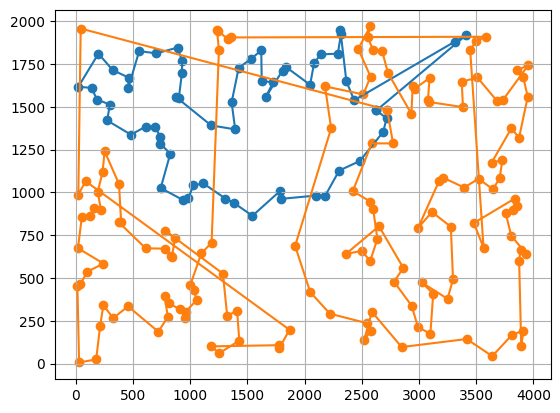

In [8]:
plt.scatter(np.array(cycle_1).T[0],np.array(cycle_1).T[1])
plt.scatter(np.array(cycle_2).T[0],np.array(cycle_2).T[1])
plt.plot(np.array(cycle_1).T[0],np.array(cycle_1).T[1])
plt.plot(np.array(cycle_2).T[0],np.array(cycle_2).T[1])
plt.grid(True)